In [ ]:
import pandas as pd

# Generate summary statistics
summary_stats = airbnb_data.describe()

# Print summary statistics
print(summary_stats)


       Airbnb Host ID  Airbnb Property ID  superhost_period_all  \
count    9.978000e+03        9.978000e+03           9978.000000   
mean     4.724594e+07        1.662004e+07             11.484466   
std      4.716134e+07        9.127752e+06              4.630370   
min      2.745000e+03        1.214000e+04              5.000000   
25%      1.061025e+07        9.590138e+06              7.000000   
50%      3.214791e+07        1.549572e+07             11.000000   
75%      6.676679e+07        2.160967e+07             15.000000   
max      2.016692e+08        4.279568e+07             20.000000   

       scrapes_in_period  superhost_observed_in_period  \
count        9978.000000                   9978.000000   
mean            5.779615                      5.644017   
std             5.058091                      4.998442   
min             1.000000                      1.000000   
25%             3.000000                      3.000000   
50%             4.000000                      4.

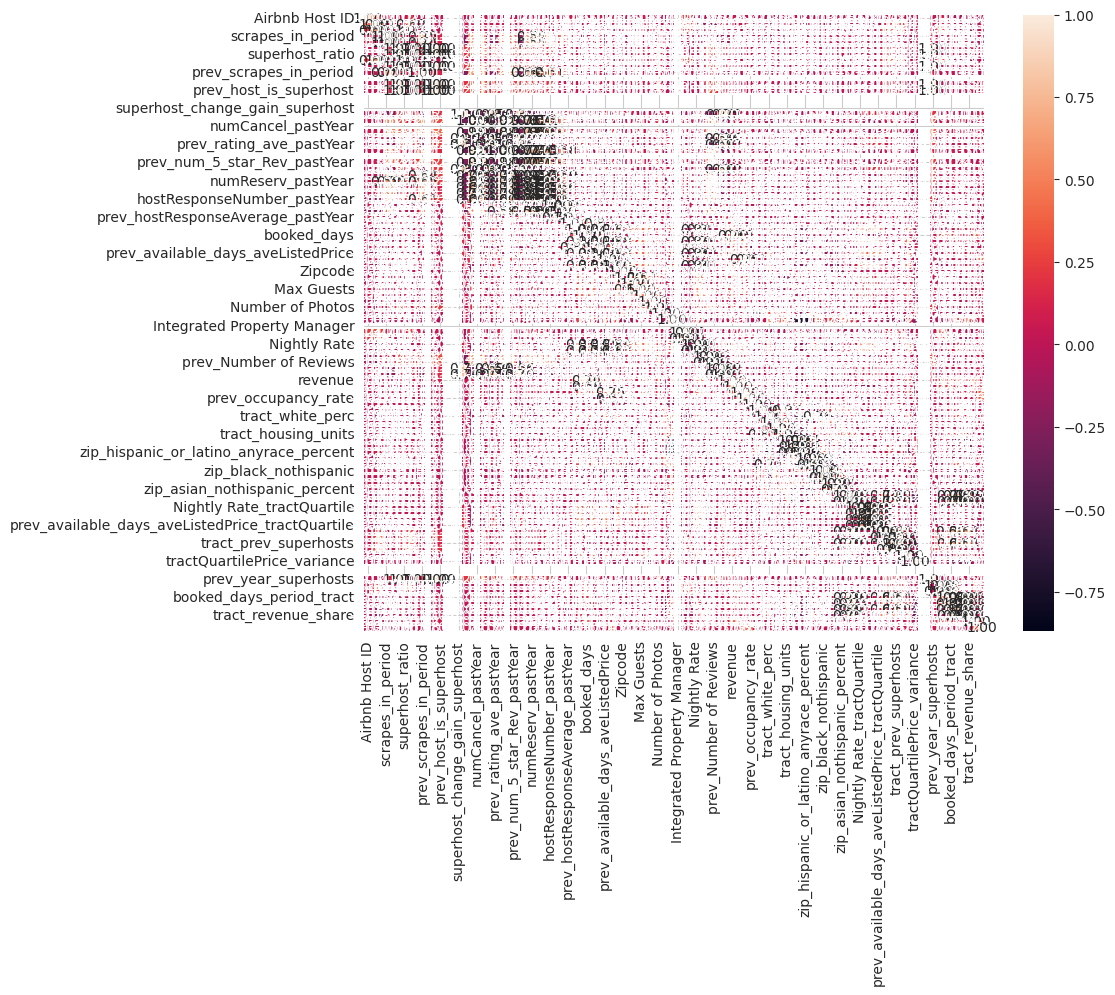

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(airbnb_data[num_columns].corr(), annot=True, fmt=".2f")
plt.show()


<ipython-input-28-94cbae8ee760>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = airbnb_data.corr()


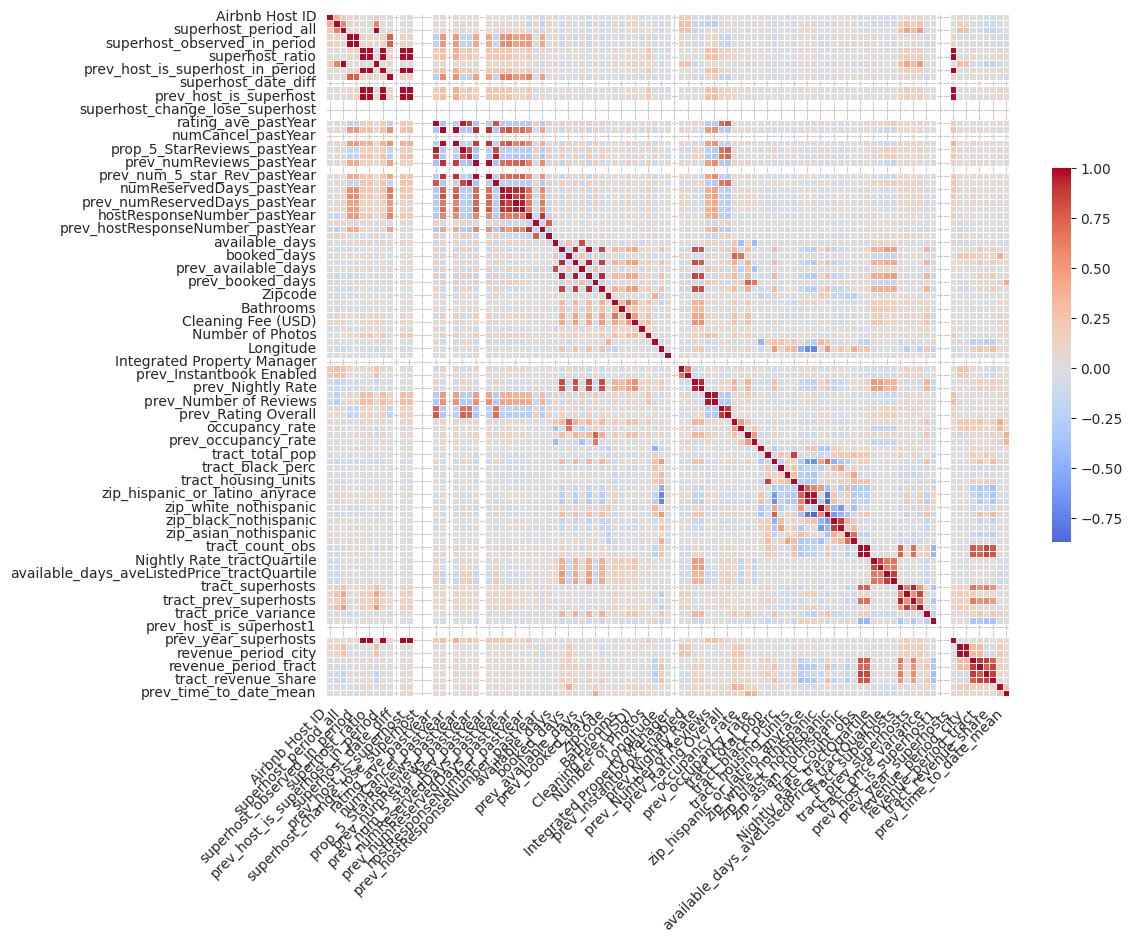

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'airbnb_data' DataFrame is already loaded and available
# and 'correlation_matrix' is computed from your data

# Generate the correlation matrix
correlation_matrix = airbnb_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, annot=False,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Adjust layout for better readability if necessary
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()


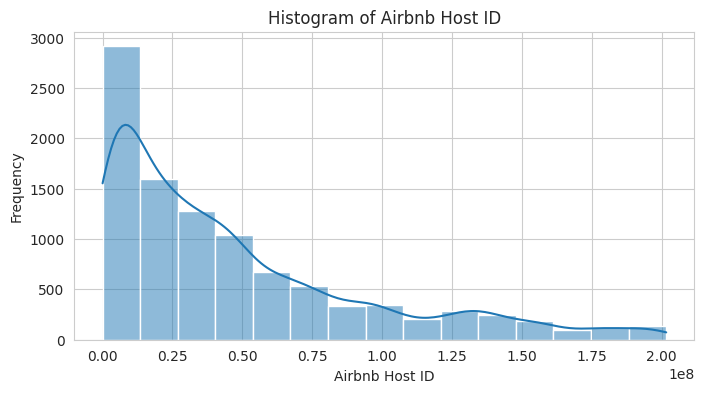

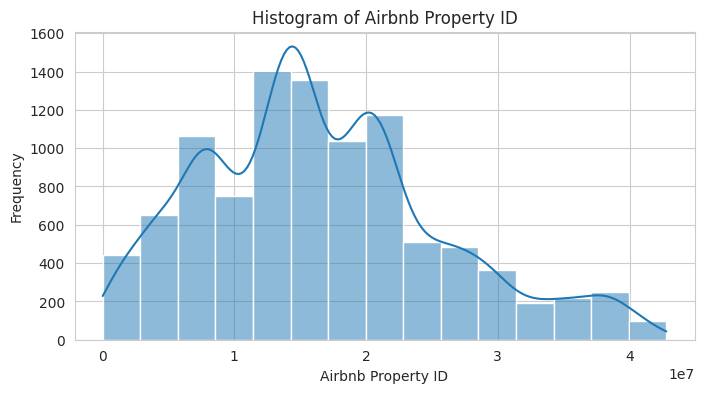

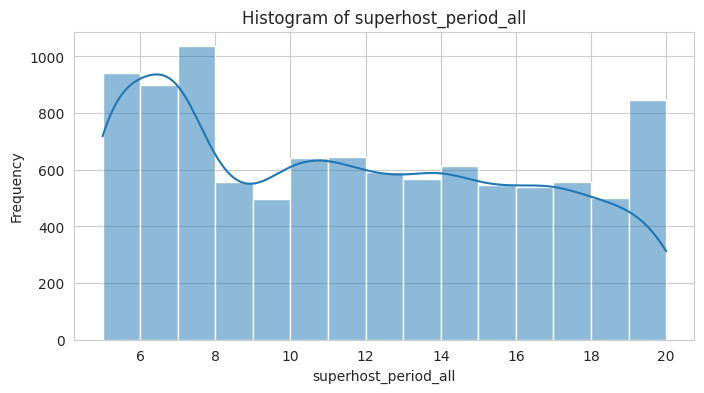

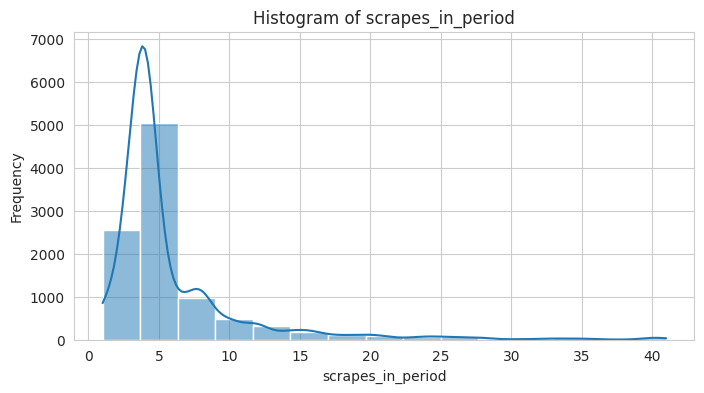

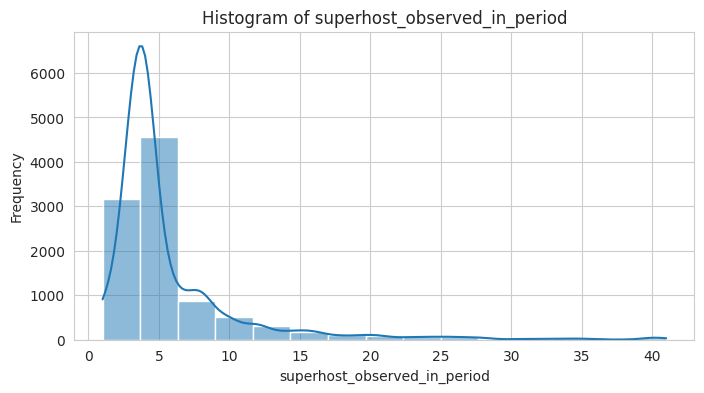

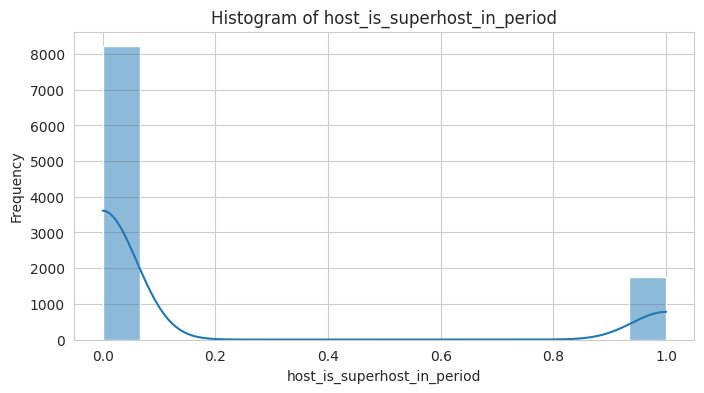

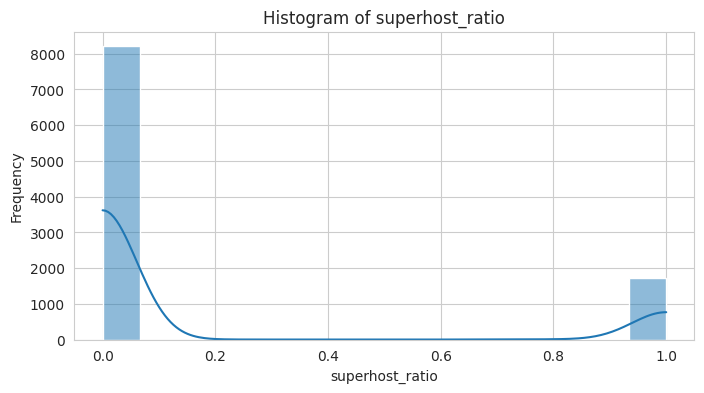

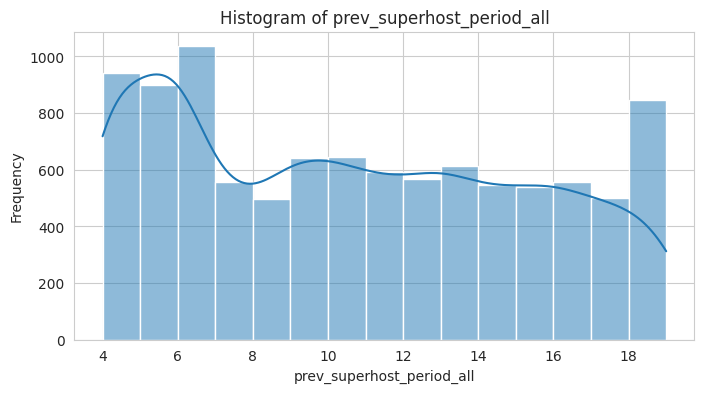

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select a subset of numerical columns for visualization
num_columns = airbnb_data.select_dtypes(include=['float64', 'int64']).columns
selected_columns = num_columns[:8]  # Adjust this to select different columns

# Create histograms for the selected columns
for col in selected_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(airbnb_data[col], bins=15, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


In [ ]:
import pandas as pd
airbnb_data = pd.read_csv('/content/airbnb_Chicago.csv')

#Data Preprocessing
# Calculate the correlation matrix
correlation_matrix = airbnb_data.corr()

# Get the correlations with the 'revenue' column
revenue_correlations = correlation_matrix['revenue']

# Variables with a positive relationship with revenue
positive_correlations = revenue_correlations[revenue_correlations > 0].index.tolist()

# Variables with a negative relationship with revenue
negative_correlations = revenue_correlations[revenue_correlations < 0].index.tolist()

# Print the lists
print("Variables with a positive relationship with revenue:")
print(positive_correlations)
print("\nVariables with a negative relationship with revenue:")
print(negative_correlations)

<ipython-input-1-407895332d6d>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = airbnb_data.corr()


Variables with a positive relationship with revenue:
['Airbnb Host ID', 'Airbnb Property ID', 'scrapes_in_period', 'superhost_observed_in_period', 'host_is_superhost_in_period', 'superhost_ratio', 'prev_host_is_superhost_in_period', 'prev_scrapes_in_period', 'Superhost', 'prev_host_is_superhost', 'superhost_change', 'superhost_change_lose_superhost', 'superhost_change_gain_superhost', 'rating_ave_pastYear', 'numReviews_pastYear', 'numCancel_pastYear', 'num_5_star_Rev_pastYear', 'prop_5_StarReviews_pastYear', 'prev_rating_ave_pastYear', 'prev_numReviews_pastYear', 'prev_numCancel_pastYear', 'prev_num_5_star_Rev_pastYear', 'prev_prop_5_StarReviews_pastYear', 'numReservedDays_pastYear', 'numReserv_pastYear', 'prev_numReservedDays_pastYear', 'prev_numReserv_pastYear', 'hostResponseNumber_pastYear', 'hostResponseAverage_pastYear', 'prev_hostResponseNumber_pastYear', 'prev_hostResponseAverage_pastYear', 'available_days', 'available_days_aveListedPrice', 'booked_days', 'booked_days_avePrice',

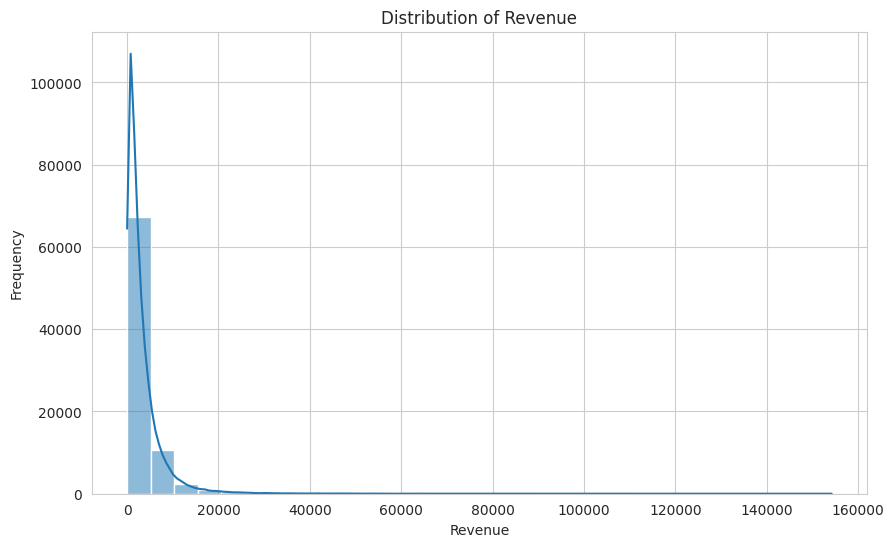

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of revenue
sns.set_style('whitegrid') # Setting the style for the plot
plt.figure(figsize=(10, 6)) # Setting the figure size
sns.histplot(airbnb_data['revenue'], kde=True, bins=30) # Plotting the histogram with a kernel density estimate
plt.title('Distribution of Revenue') # Title of the plot
plt.xlabel('Revenue') # X-axis label
plt.ylabel('Frequency') # Y-axis label
plt.show() # To display the plot


In [ ]:
print(airbnb_data.shape)

(120217, 111)


In [ ]:
import numpy as np
# Select only numeric columns for IQR calculation
numeric_data = airbnb_data.select_dtypes(include=[np.number])

# Calculate IQR for each numeric column
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the dataset
# Use 'any(axis=1)' to remove a row if any column has an outlier
airbnb_data = airbnb_data[~((numeric_data < lower_bound) | (numeric_data > upper_bound)).any(axis=1)]

In [ ]:
print(airbnb_data.shape)

(9978, 111)


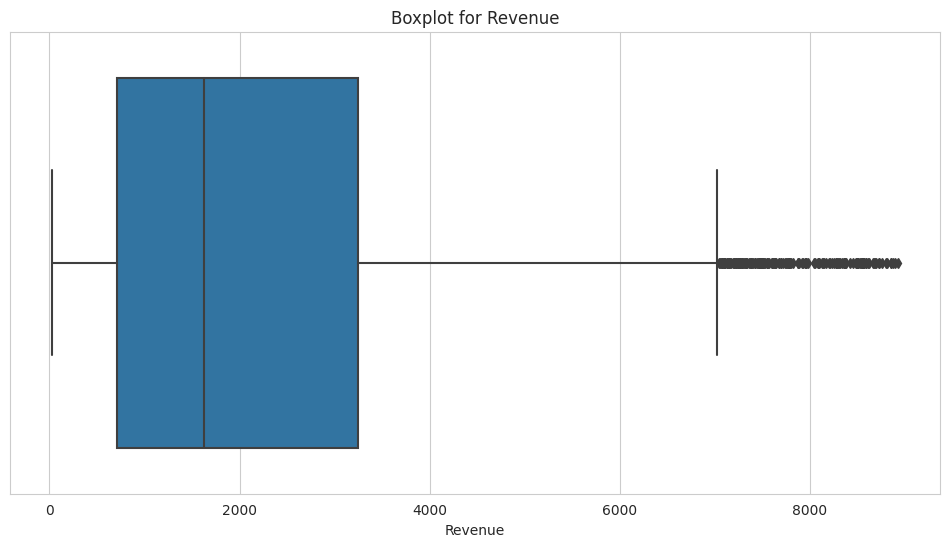

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting a boxplot to visualize outliers for 'revenue'
plt.figure(figsize=(12, 6))
sns.boxplot(data=airbnb_data, x='revenue')
plt.title('Boxplot for Revenue')
plt.xlabel('Revenue')
plt.show()


In [ ]:
print(airbnb_data.shape)

(9978, 111)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
# Define your independent variables (X) and dependent variable (y)
independent_variables = ['Bedrooms', 'Bathrooms', 'Max Guests', 'Cleaning Fee (USD)',
                         'Minimum Stay', 'Number of Photos', 'Nightly Rate', 'Number of Reviews',
                         'Rating Overall', 'occupancy_rate', 'zip_total_population',
                         'zip_white_nothispanic_percent', 'zip_black_nothispanic_percent',
                         'zip_asian_nothispanic_percent', 'tract_superhosts_ratio',
                         'booked_days_period_city', 'tract_booking_share']
X = airbnb_data[independent_variables]  # Independent variables
y = airbnb_data['revenue']              # Dependent variable

# Handle missing values (here, we're dropping rows with missing values)
X = X.dropna()
y = y[X.index]

# Splitting the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split


# Define your independent variables (X) and dependent variable (y)
independent_variables = ['Bedrooms', 'Bathrooms', 'Max Guests', 'Cleaning Fee (USD)',
                         'Minimum Stay', 'Number of Photos', 'Nightly Rate', 'Number of Reviews',
                         'Rating Overall', 'occupancy_rate', 'zip_total_population',
                         'zip_white_nothispanic_percent', 'zip_black_nothispanic_percent',
                         'zip_asian_nothispanic_percent', 'tract_superhosts_ratio',
                         'booked_days_period_city']
X = airbnb_data[independent_variables]  # Independent variables
y = airbnb_data['revenue']              # Dependent variable

# Handle missing values (here, we're dropping rows with missing values)
X = X.dropna()
y = y[X.index]

# Adding a constant term to the independent variables
X_ols = sm.add_constant(X)

# Creating and fitting the OLS regression model
ols_model = sm.OLS(y, X_ols).fit()

# Getting the OLS regression results
ols_results = ols_model.summary()

print(ols_results)


                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     238.9
Date:                Fri, 08 Dec 2023   Prob (F-statistic):               0.00
Time:                        17:28:55   Log-Likelihood:                -37071.
No. Observations:                4267   AIC:                         7.418e+04
Df Residuals:                    4250   BIC:                         7.428e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

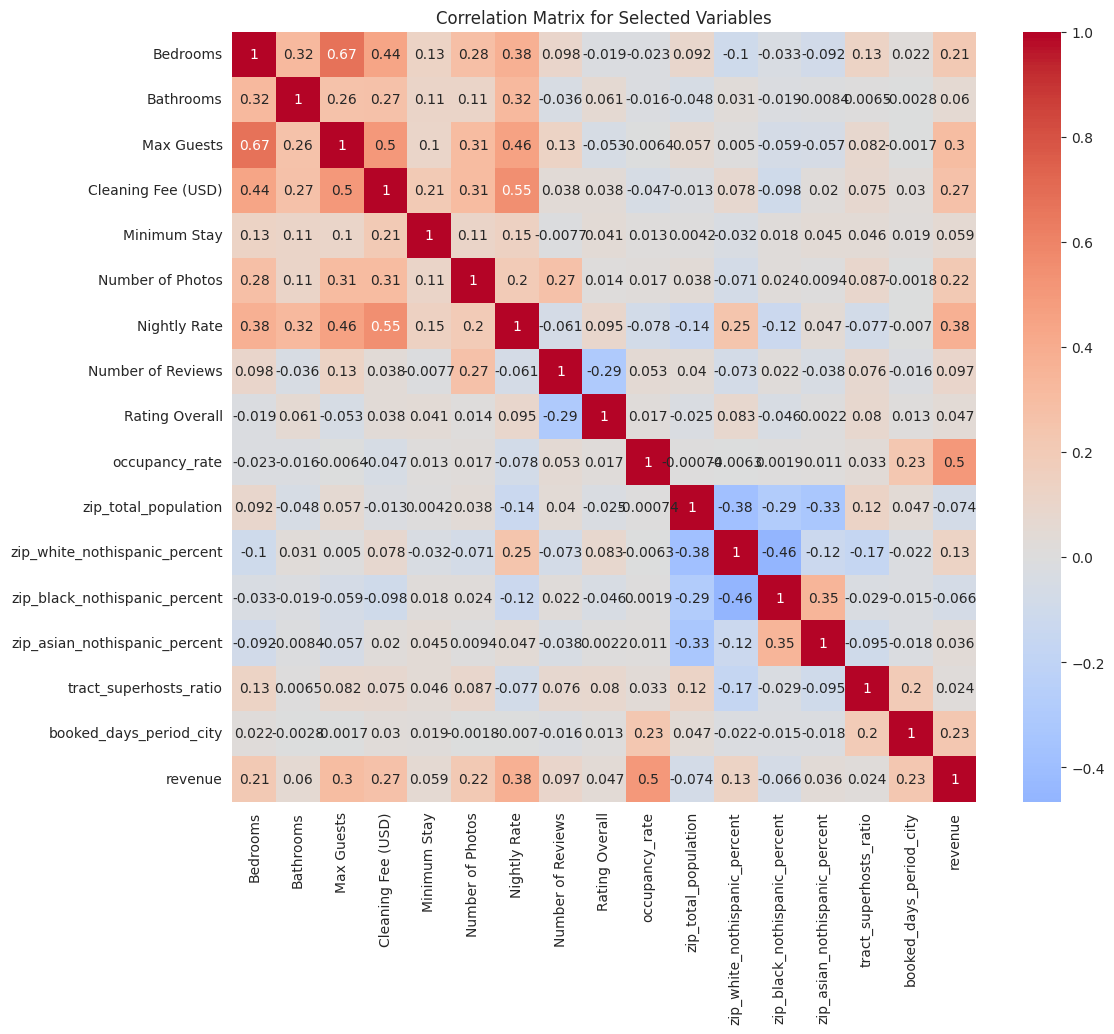

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'airbnb_data' DataFrame is already loaded and available

# Define the list of variables you're interested in
variables_of_interest = [
    'Bedrooms', 'Bathrooms', 'Max Guests', 'Cleaning Fee (USD)',
    'Minimum Stay', 'Number of Photos', 'Nightly Rate', 'Number of Reviews',
    'Rating Overall', 'occupancy_rate', 'zip_total_population',
    'zip_white_nothispanic_percent', 'zip_black_nothispanic_percent',
    'zip_asian_nothispanic_percent', 'tract_superhosts_ratio',
    'booked_days_period_city', 'revenue'
]

# Create a new DataFrame with the selected variables
selected_data = airbnb_data[variables_of_interest]

# Compute the correlation matrix for the selected variables
corr_matrix_selected = selected_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_selected, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix for Selected Variables')
plt.show()


<ipython-input-30-65c730ee8c48>:22: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = airbnb_data[columns_for_correlation].corr()


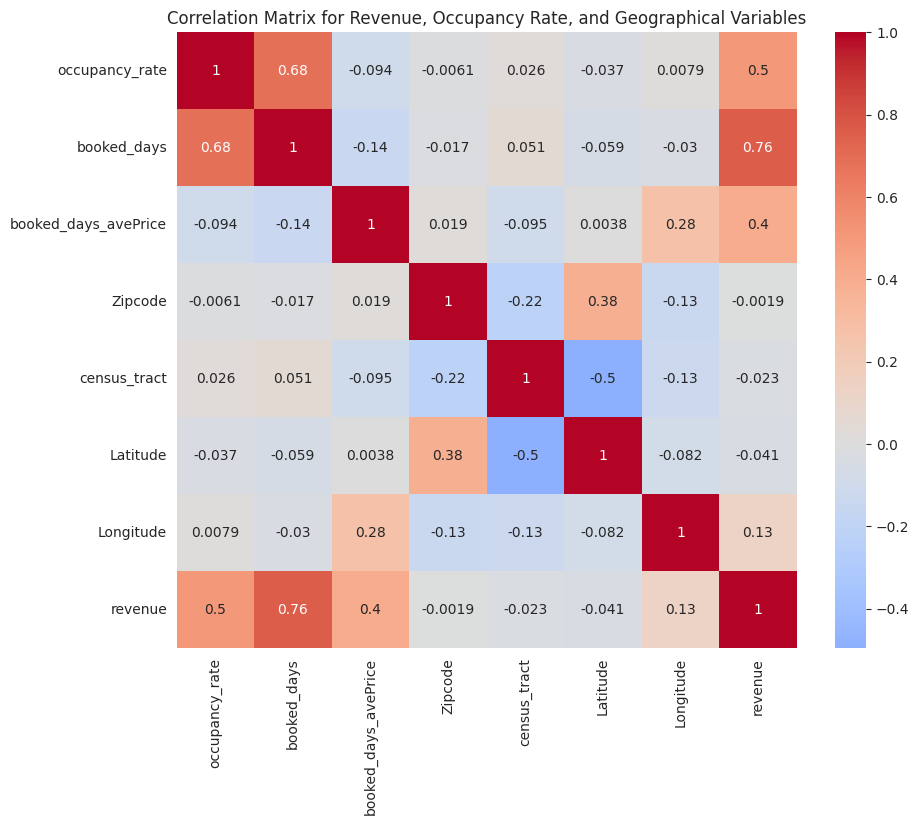

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'airbnb_data' DataFrame is already loaded and available

# Selecting the 'revenue' column as the dependent variable
# and 'occupancy_rate', 'zip_total_population', 'zip_white_nothispanic_percent',
# 'zip_black_nothispanic_percent', and 'zip_asian_nothispanic_percent' as independent variables

# Define the columns for correlation
columns_for_correlation = [
    'occupancy_rate',
    'booked_days',
    'booked_days_avePrice',
    'Neighborhood',
    'Zipcode', 'census_tract',
    'Latitude', 'Longitude', 'Property Type',
    'revenue'  # Dependent variable
]

# Calculate the correlation matrix for the specified columns
correlation_matrix = airbnb_data[columns_for_correlation].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix for Revenue, Occupancy Rate, and Geographical Variables')
plt.show()


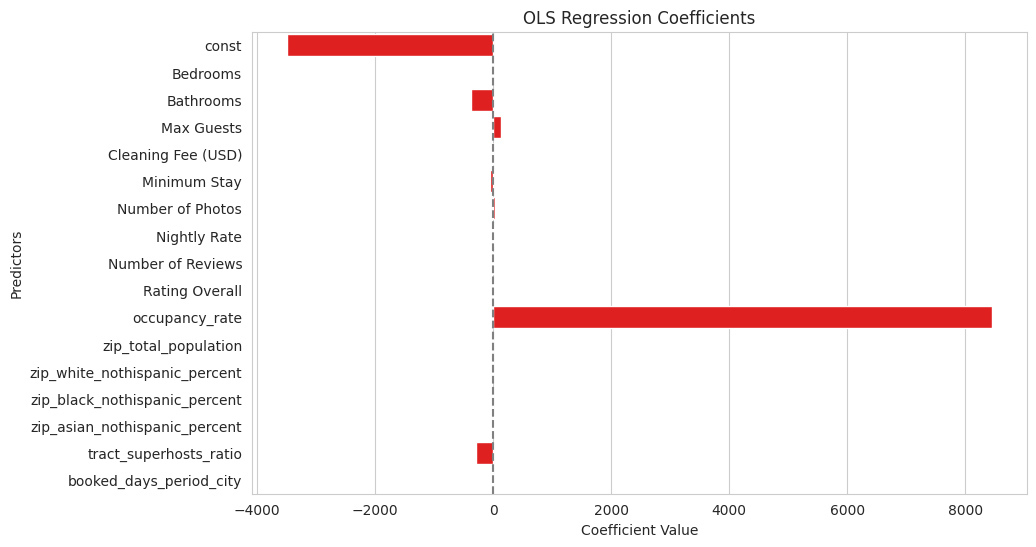

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'ols_model' is your fitted OLS model from statsmodels
# Extracting coefficients and p-values
coefficients = ols_model.params
p_values = ols_model.pvalues

# Preparing data for plotting
variables = coefficients.index
coefficients = coefficients.values

# Coloring the bars based on p-values (e.g., red if p-value < 0.05, else blue)
colors = ['red' if p < 0.05 else 'blue' for p in p_values]

# Creating the plot
plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients, y=variables, palette=colors)
plt.axvline(x=0, linestyle='--', color='grey')
plt.title('OLS Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Predictors')

# Show the plot
plt.show()


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_percentage_error

# Assuming X_train, X_test, y_train, y_test are already defined from your previous train-test split

# Initialize the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,
                                max_depth=3, random_state=42)

# Fit the model
gbr.fit(X_train, y_train)

# Predicting the Test set results
y_pred = gbr.predict(X_test)

# Calculating R squared
r2 = r2_score(y_test, y_pred)

# Calculating Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"R-squared: {r2}")
print(f"MAPE: {mape}")


R-squared: 0.6207382650393543
MAPE: 0.7619182098147623


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Separate features and target variable
# This assumes 'revenue' is the name of your target variable
X = airbnb_data.drop(columns='revenue')
y = airbnb_data['revenue'].copy()  # Make a copy of the target variable

# Split the data before applying any preprocessing to avoid data leakage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check and handle NaN values in the target variable
y_train = y_train.fillna(y_train.mean())  # Replace NaN with the mean of the training target
y_test = y_test.fillna(y_test.mean())     # Do the same for the test target

# Define the preprocessing for numerical columns
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

# Define the preprocessing for categorical columns
categorical_features = X_train.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the Gradient Boosting Regressor pipeline
gbr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', GradientBoostingRegressor(n_estimators=100,
                                                                        learning_rate=0.1,
                                                                        max_depth=3,
                                                                        random_state=42))])

# Fit the pipeline to the training data
gbr_pipeline.fit(X_train, y_train)

# Predict on the testing data
y_pred = gbr_pipeline.predict(X_test)

# Calculate the R-squared value for the test set
r2 = r2_score(y_test, y_pred)

# Print the R-squared value
print(f"R-squared: {r2}")


R-squared: 0.9960166237489455


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Separate features and target variable
# This assumes 'revenue' is the name of your target variable
X = airbnb_data.drop(columns='revenue')
y = airbnb_data['revenue'].copy()  # Make a copy of the target variable

# Split the data before applying any preprocessing to avoid data leakage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check and handle NaN values in the target variable
y_train = y_train.fillna(y_train.mean())  # Replace NaN with the mean of the training target
y_test = y_test.fillna(y_test.mean())     # Do the same for the test target

# Define the preprocessing for numerical columns
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

# Define the preprocessing for categorical columns
categorical_features = X_train.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the Gradient Boosting Regressor pipeline
gbr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', GradientBoostingRegressor(n_estimators=100,
                                                                        learning_rate=0.01,
                                                                        max_depth=3,
                                                                        random_state=42))])

# Fit the pipeline to the training data
gbr_pipeline.fit(X_train, y_train)

# Predict on the testing data
y_pred = gbr_pipeline.predict(X_test)

# Calculate the R-squared value for the test set
r2 = r2_score(y_test, y_pred)

# Print the R-squared value
print(f"R-squared: {r2}")


R-squared: 0.7597118165388432


In [ ]:
'Bedrooms', 'Bathrooms', 'Max Guests', 'Cleaning Fee (USD)',
                         'Minimum Stay', 'Number of Photos', 'Nightly Rate', 'Number of Reviews',
                         'Rating Overall', 'occupancy_rate', 'zip_total_population',
                         'zip_white_nothispanic_percent', 'zip_black_nothispanic_percent',
                         'zip_asian_nothispanic_percent', 'tract_superhosts_ratio',
                         'booked_days_period_city'

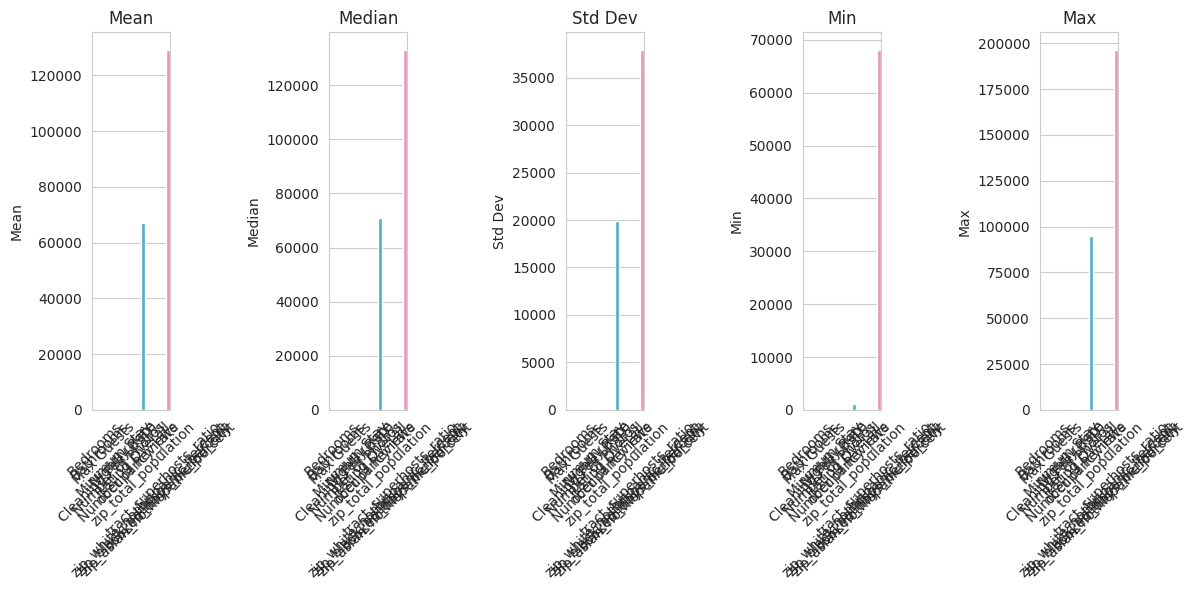

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Select important variables for which you want to visualize the summary statistics
# Replace these with the actual variable names from your dataset
important_variables = ['Bedrooms', 'Bathrooms', 'Max Guests', 'Cleaning Fee (USD)',
                         'Minimum Stay', 'Number of Photos', 'Nightly Rate', 'Number of Reviews',
                         'Rating Overall', 'occupancy_rate', 'zip_total_population',
                         'zip_white_nothispanic_percent', 'zip_black_nothispanic_percent',
                         'zip_asian_nothispanic_percent', 'tract_superhosts_ratio',
                         'booked_days_period_city']

# Create a DataFrame to store summary statistics
summary_stats = pd.DataFrame(index=important_variables, columns=['Mean', 'Median', 'Std Dev', 'Min', 'Max'])

# Calculate summary statistics for each variable
for var in important_variables:
    summary_stats.loc[var, 'Mean'] = airbnb_data[var].mean()
    summary_stats.loc[var, 'Median'] = airbnb_data[var].median()
    summary_stats.loc[var, 'Std Dev'] = airbnb_data[var].std()
    summary_stats.loc[var, 'Min'] = airbnb_data[var].min()
    summary_stats.loc[var, 'Max'] = airbnb_data[var].max()

# Plotting
plt.figure(figsize=(12, 6))
for i, stat in enumerate(summary_stats.columns):
    plt.subplot(1, len(summary_stats.columns), i+1)
    sns.barplot(x=summary_stats.index, y=summary_stats[stat])
    plt.title(stat)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-49-a432bdafb412>:20: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


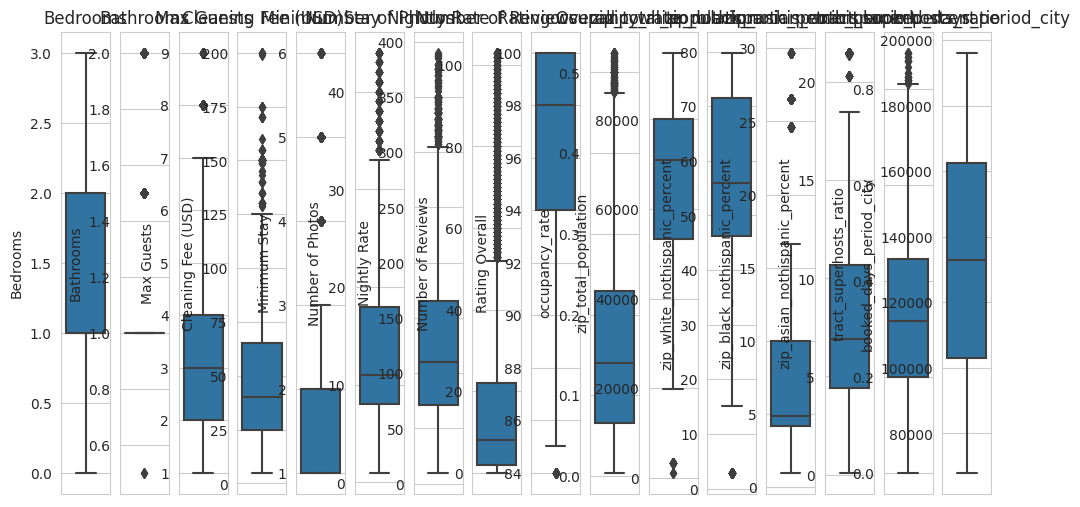

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Select important variables for visualization
# Replace these with the actual variable names from your dataset
important_variables = ['Bedrooms', 'Bathrooms', 'Max Guests', 'Cleaning Fee (USD)',
                         'Minimum Stay', 'Number of Photos', 'Nightly Rate', 'Number of Reviews',
                         'Rating Overall', 'occupancy_rate', 'zip_total_population',
                         'zip_white_nothispanic_percent', 'zip_black_nothispanic_percent',
                         'zip_asian_nothispanic_percent', 'tract_superhosts_ratio',
                         'booked_days_period_city']

# Plotting box plots for each important variable
plt.figure(figsize=(12, 6))
for i, var in enumerate(important_variables):
    plt.subplot(1, len(important_variables), i+1)
    sns.boxplot(y=airbnb_data[var])
    plt.title(var)
plt.tight_layout()
plt.show()


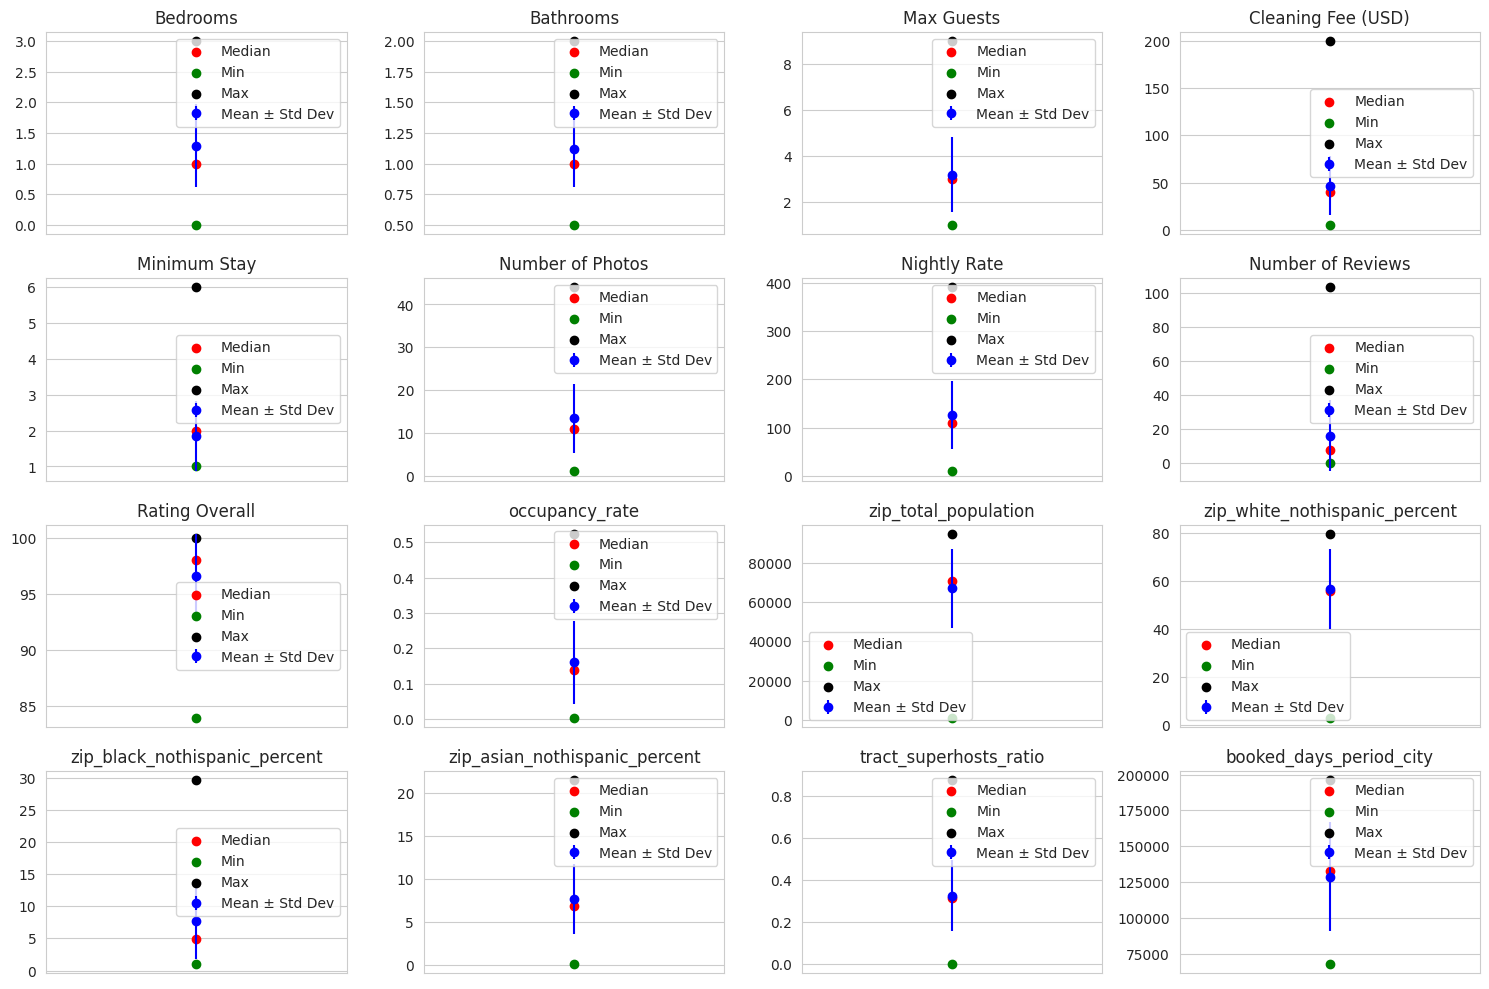

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define the variables of interest
variables_of_interest = [
    'Bedrooms', 'Bathrooms', 'Max Guests', 'Cleaning Fee (USD)',
    'Minimum Stay', 'Number of Photos', 'Nightly Rate', 'Number of Reviews',
    'Rating Overall', 'occupancy_rate', 'zip_total_population',
    'zip_white_nothispanic_percent', 'zip_black_nothispanic_percent',
    'zip_asian_nothispanic_percent', 'tract_superhosts_ratio',
    'booked_days_period_city'
]

# Plot summary statistics for each variable
plt.figure(figsize=(15, 10))  # Adjust the size as needed
for i, var in enumerate(variables_of_interest):
    # Calculate summary statistics
    mean_val = airbnb_data[var].mean()
    median_val = airbnb_data[var].median()
    std_val = airbnb_data[var].std()
    min_val = airbnb_data[var].min()
    max_val = airbnb_data[var].max()

    # Create subplots for each variable
    plt.subplot(4, 4, i + 1)  # Adjust grid dimension according to the number of variables
    # Plot mean, median, std, min, and max
    plt.errorbar(x=0, y=mean_val, yerr=std_val, fmt='o', label='Mean ± Std Dev', color='blue')
    plt.scatter(x=0, y=median_val, label='Median', color='red')
    plt.scatter(x=0, y=min_val, label='Min', color='green')
    plt.scatter(x=0, y=max_val, label='Max', color='black')

    # Set plot titles and labels
    plt.title(var)
    plt.xticks([])  # Remove x-ticks as they are not needed
    plt.legend()

plt.tight_layout()
plt.show()
